## 🔗 Notebook Workflow Overview

This TIMM-based image classification pipeline is organized into three modular notebooks:

1. **`TIMM_Install&Train.ipynb`**  
   Sets up the environment and trains a baseline model using a lightweight dataset. This is a good entry point for verifying model architecture, training loop, and basic setup.

2. **`TIMM_CustomedTrain.ipynb`**  
   Demonstrates how to apply TIMM models to a custom image classification dataset. Useful for adapting the training logic to datasets with different class definitions or distributions.

3. **`TIMM_Validate&Inference.ipynb`**  
   Focuses on evaluating trained models and running inference on new images. This notebook assumes a pretrained model is available and provides insights into accuracy and deployment use cases.

➡️ Each notebook is self-contained but follows a logical order. You can run them independently after setting the correct paths and prerequisites.

# Validation and Inference with TIMM

This notebook demonstrates how to perform **validation and inference** using a pretrained TIMM model on a dataset prepared in the standard folder format (e.g., `val/class_x/`). Although the example may use Imagenette or Cassava Leaf Disease, the process applies to any dataset that fits this structure.

**Objective:** To evaluate a trained model’s performance and generate predictions on unseen image data.

**Dataset Background**: This stage focuses on evaluating trained models and running inference on unseen data. It is agnostic to the specific dataset used, as long as the data follows the expected directory structure (e.g., class-based folders). This step is applicable to a wide range of scenarios, including **validating model generalization**, **benchmarking on custom test sets**, and **generating predictions for deployment in real-world applications**.


In [1]:
%cd pytorch-image-models

/home/z890/Downloads/ml_sample/carasml/classification/TIMM/pytorch-image-models


/home/z890/.local/share/mamba/envs/timmt1/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# validate
#this function only provide overall accuracy, if you need accuracy of each class, go to inference and plot confusion matrix
fill in the blanks <br>
%run validate.py "your dataset location" --model "model name" --num-classes "number of object classes" --img-size "height&width" --batch-size "batch size" --checkpoint "check point location stored in ./output/train/"

In [6]:
import os
from glob import glob

def get_latest_checkpoint(base_dir="./output/train"):
    subdirs = [os.path.join(base_dir, d) for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
    subdirs.sort(key=os.path.getmtime, reverse=True)  # Sort by Time
    for d in subdirs:
        ckpt_path = os.path.join(d, "model_best.pth.tar")
        if os.path.exists(ckpt_path):
            return ckpt_path
    return None

latest_ckpt = get_latest_checkpoint()
print(f"Using checkpoint: {latest_ckpt}")

Using checkpoint: ./output/train/20250620-143626-seresnext101d_32x8d-384/model_best.pth.tar


In [7]:
%run validate.py ../dataset/cassavaleafdata\
    --model seresnext101d_32x8d \
    --num-classes 5 \
    --img-size 384 \
    --checkpoint {latest_ckpt} \
    --batch-size 16

Validating in torch.float32. AMP not enabled.
Validating in torch.float32. AMP not enabled.
Validating in torch.float32. AMP not enabled.
Loaded state_dict from checkpoint './output/train/20250620-143626-seresnext101d_32x8d-384/model_best.pth.tar'
Loaded state_dict from checkpoint './output/train/20250620-143626-seresnext101d_32x8d-384/model_best.pth.tar'
Loaded state_dict from checkpoint './output/train/20250620-143626-seresnext101d_32x8d-384/model_best.pth.tar'
Model seresnext101d_32x8d created, param count: 91549525
Model seresnext101d_32x8d created, param count: 91549525
Model seresnext101d_32x8d created, param count: 91549525
Data processing configuration for current model + dataset:
Data processing configuration for current model + dataset:
Data processing configuration for current model + dataset:
	input_size: (3, 384, 384)
	input_size: (3, 384, 384)
	input_size: (3, 384, 384)
	interpolation: bicubic
	interpolation: bicubic
	interpolation: bicubic
	mean: (0.485, 0.456, 0.406)
	m

--result
{
    "model": "seresnext101d_32x8d",
    "top1": 72.7369,
    "top1_err": 27.2631,
    "top5": 100.0,
    "top5_err": 0.0,
    "param_count": 91.55,
    "img_size": 384,
    "crop_pct": 1.0,
    "interpolation": "bicubic"
}


In [8]:
# create an inference folder

%cd output
!mkdir inference
%cd ..

/home/z890/Downloads/ml_sample/carasml/classification/TIMM/pytorch-image-models/output
/home/z890/Downloads/ml_sample/carasml/classification/TIMM/pytorch-image-models


/home/z890/.local/share/mamba/envs/timmt1/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# inference
fill in the blanks <br>
%run inference.py "your dataset location" --model "model name" --num-classes "number of object classes" --img-size "height&width" --batch-size "batch size" --checkpoint "check point location stored in ./output/train/" --results-dir "where you want to save results" --include-index

In [9]:
%run inference.py ../dataset/cassavaleafdata\
    --model seresnext101d_32x8d \
    --num-classes 5 \
    --img-size 384 \
    --checkpoint {latest_ckpt} \
    --batch-size 16 \
    --results-dir ./output/inference \
    --include-index

Running inference in float32. AMP not enabled.
Running inference in float32. AMP not enabled.
Running inference in float32. AMP not enabled.
Running inference in float32. AMP not enabled.
Loaded state_dict from checkpoint './output/train/20250620-143626-seresnext101d_32x8d-384/model_best.pth.tar'
Loaded state_dict from checkpoint './output/train/20250620-143626-seresnext101d_32x8d-384/model_best.pth.tar'
Loaded state_dict from checkpoint './output/train/20250620-143626-seresnext101d_32x8d-384/model_best.pth.tar'
Loaded state_dict from checkpoint './output/train/20250620-143626-seresnext101d_32x8d-384/model_best.pth.tar'
Model seresnext101d_32x8d created, param count: 91549525
Model seresnext101d_32x8d created, param count: 91549525
Model seresnext101d_32x8d created, param count: 91549525
Model seresnext101d_32x8d created, param count: 91549525
ERROR: Cannot deduce ImageNet subset from model, no labelling will be performed.
ERROR: Cannot deduce ImageNet subset from model, no labelling w

--result
{
    "validation-cbb-0.jpg":{
        "index":0,
        "prob":0.5124821663
    },
    "validation-cbb-1.jpg":{
        "index":2,
        "prob":0.4087859392
    },
    "validation-cbb-2.jpg":{
        "index":3,
        "prob":0.4417708516
    },
    "validation-cbb-3.jpg":{
        "index":1,
        "prob":0.3895839751
    },
    "validation-cbb-4.jpg":{
        "index":1,
        "prob":0.4224973619
    },
    "validation-cbb-5.jpg":{
        "index":0,
        "prob":0.7777591348
    },
    "validation-cbb-6.jpg":{
        "index":0,
        "prob":0.8688755631
    },
    "validation-cbb-7.jpg":{
        "index":4,
        "prob":0.3546746671
    },
    "validation-cbb-8.jpg":{
        "index":1,
        "prob":0.5388536453
    },
    "validation-cbb-9.jpg":{
        "index":3,
        "prob":0.3775545359
    },
    "validation-cbb-10.jpg":{
        "index":1,
        "prob":0.3078548312
    },
    "validation-cbb-11.jpg":{
        "index":1,
        "prob":0.487062037

In [10]:
#after validation or inference, clear cache
import torch
torch.cuda.empty_cache()
torch.cuda.synchronize()

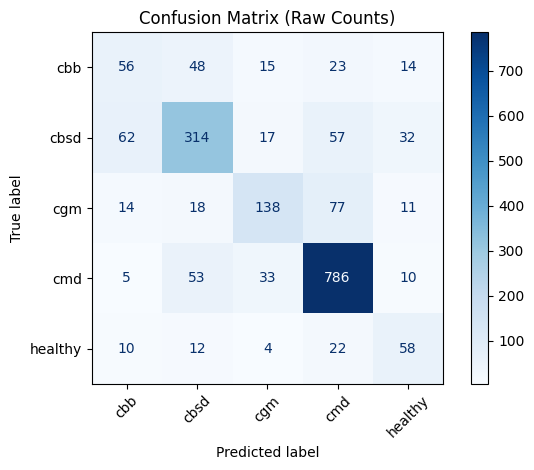

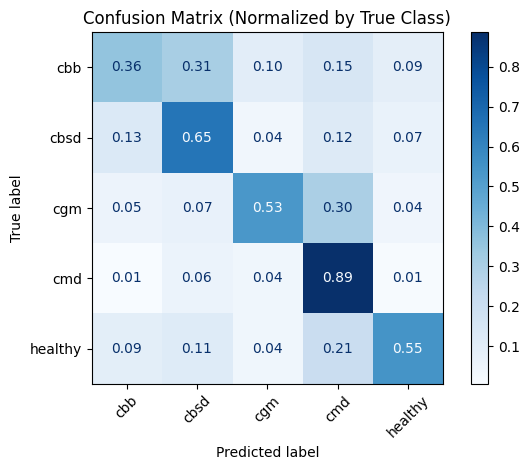

Per-class accuracy: [0.35897436 0.65145228 0.53488372 0.88613303 0.54716981]
Mean class accuracy: 0.5957


In [11]:
# plot confusion matrix
import os
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Path to the validation dataset and prediction CSV
val_dir = '../dataset/cassavaleafdata/validation'
csv_path = './output/inference/seresnext101d_32x8d-384.csv'

# Load predictions
df_pred = pd.read_csv(csv_path)

# Step 1: Get mapping of filename to ground truth label from val directory
true_labels = {}
class_names = sorted(os.listdir(val_dir))  # list of class names (sorted for consistent indexing)
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(class_names)}

for class_name in class_names:
    class_path = os.path.join(val_dir, class_name)
    for fname in os.listdir(class_path):
        true_labels[fname] = class_to_idx[class_name]

# Step 2: Map true labels to the predictions
df_pred['true'] = df_pred['filename'].map(true_labels)

# Drop rows where mapping failed
df_pred = df_pred.dropna(subset=['true'])

# Convert to int
df_pred['true'] = df_pred['true'].astype(int)
df_pred['index'] = df_pred['index'].astype(int)

# Step 3: Raw confusion matrix
y_true = df_pred['true']
y_pred = df_pred['index']

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title("Confusion Matrix (Raw Counts)")
plt.tight_layout()
plt.show()

# Step 4: Normalized confusion matrix (percentage)
cm_percent = confusion_matrix(y_true, y_pred, normalize='true')
disp_percent = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=class_names)
disp_percent.plot(xticks_rotation=45, cmap='Blues', values_format=".2f") 
plt.title("Confusion Matrix (Normalized by True Class)")
plt.tight_layout()
plt.show()

# Step 5: Compute per-class accuracy
per_class_acc = cm.diagonal() / cm.sum(axis=1)

# Step 6: Compute mean (class-averaged) accuracy
mean_class_accuracy = per_class_acc.mean()

print("Per-class accuracy:", per_class_acc)
print(f"Mean class accuracy: {mean_class_accuracy:.4f}")

# Export to onnx

fill in the blanks <br>
%run onnx_export.py "name your onnx" --model "model name" --num-classes "number of object classes" --img-size "height&width" --checkpoint "check point location stored in ./output/train/"

In [12]:
%run onnx_export.py  seresnext101d_32x8d.onnx \
    --model seresnext101d_32x8d \
    --num-classes 5 \
    --img-size 384 \
    --checkpoint {latest_ckpt}

==> Creating PyTorch seresnext101d_32x8d model


Loaded state_dict from checkpoint './output/train/20250620-143626-seresnext101d_32x8d-384/model_best.pth.tar'
Loaded state_dict from checkpoint './output/train/20250620-143626-seresnext101d_32x8d-384/model_best.pth.tar'
Loaded state_dict from checkpoint './output/train/20250620-143626-seresnext101d_32x8d-384/model_best.pth.tar'
Loaded state_dict from checkpoint './output/train/20250620-143626-seresnext101d_32x8d-384/model_best.pth.tar'


you can also validate with onnx <br>
fill in the blanks <br>
%run onnx_validate.py "your dataset location" --onnx-input "your onnx" --img-size "height&width" --batch-size "batch size"

In [13]:
%run onnx_validate.py ../dataset/cassavaleafdata \
    --onnx-input seresnext101d_32x8d.onnx \
    --img-size 384 \
    --batch-size 16 \
    --mean 0.485 0.456 0.406 \
    --std 0.229 0.224 0.225

Test: [0/119]	Time 2.287 (2.287, 6.997/s, 14.291 ms/sample) 	Prec@1 37.500 (37.500)	Prec@5 100.000 (100.000)
Test: [10/119]	Time 1.854 (1.894, 8.446/s, 11.840 ms/sample) 	Prec@1 81.250 (44.318)	Prec@5 100.000 (100.000)
Test: [20/119]	Time 2.121 (1.982, 8.072/s, 12.389 ms/sample) 	Prec@1 50.000 (51.786)	Prec@5 100.000 (100.000)
Test: [30/119]	Time 2.081 (2.017, 7.931/s, 12.609 ms/sample) 	Prec@1 43.750 (54.637)	Prec@5 100.000 (100.000)
Test: [40/119]	Time 1.960 (2.005, 7.981/s, 12.530 ms/sample) 	Prec@1 68.750 (56.098)	Prec@5 100.000 (100.000)
Test: [50/119]	Time 1.967 (1.999, 8.003/s, 12.496 ms/sample) 	Prec@1 56.250 (55.025)	Prec@5 100.000 (100.000)
Test: [60/119]	Time 1.951 (1.991, 8.035/s, 12.445 ms/sample) 	Prec@1 75.000 (57.684)	Prec@5 100.000 (100.000)
Test: [70/119]	Time 1.953 (1.987, 8.054/s, 12.416 ms/sample) 	Prec@1 87.500 (62.236)	Prec@5 100.000 (100.000)
Test: [80/119]	Time 1.958 (1.983, 8.067/s, 12.395 ms/sample) 	Prec@1 87.500 (64.352)	Prec@5 100.000 (100.000)
Test: [90/1

# Try an image

Predicted class: Cassava Bacterial Blight (CBB) with probability: 0.5124


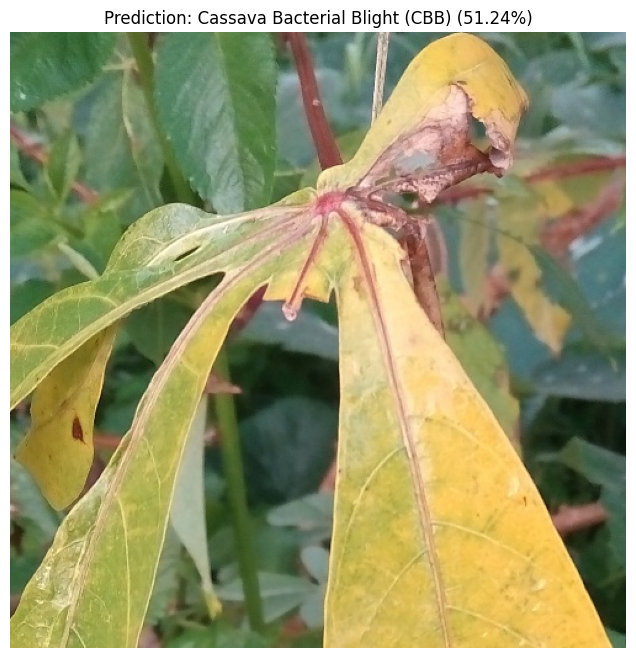

Cassava Bacterial Blight (CBB): 51.24%
Cassava Brown Streak Disease (CBSD): 25.77%
Cassava Green Mottle (CGM): 9.81%
Cassava Mosaic Disease (CMD): 9.62%
Healthy: 3.56%


In [14]:
# inference on torch
import torch
import timm
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform
from PIL import Image
import matplotlib.pyplot as plt

# === Model configuration ===
model_name = 'seresnext101d_32x8d'
num_classes = 5
checkpoint_path = latest_ckpt

# === Create model architecture ===
model = timm.create_model(model_name, num_classes=num_classes)

# === Load checkpoint safely (set weights_only=False for PyTorch >= 2.6) ===
checkpoint = torch.load(checkpoint_path, map_location='cpu', weights_only=False)

# Extract state_dict (either from wrapped checkpoint or direct)
state_dict = checkpoint.get('state_dict', checkpoint)
model.load_state_dict(state_dict)
model.eval()

# === Image preprocessing ===
config = resolve_data_config({}, model=model)
config['input_size'] = (3, 384, 384)  # Override input size if needed
config['crop_pct'] = 0.95  # Match training crop ratio
transform = create_transform(**{**config, 'is_training': False})

# === Load and transform a single image ===
img_path = '../dataset/cassavaleafdata/validation/cbb/validation-cbb-0.jpg'
img = Image.open(img_path).convert('RGB')
tensor = transform(img).unsqueeze(0)  # Add batch dimension

# === Inference ===
with torch.no_grad():
    output = model(tensor)
    probabilities = torch.nn.functional.softmax(output[0], dim=0)

# === Interpret the prediction ===
class_names = [
    'Cassava Bacterial Blight (CBB)', 
    'Cassava Brown Streak Disease (CBSD)', 
    'Cassava Green Mottle (CGM)', 
    'Cassava Mosaic Disease (CMD)', 
    'Healthy'
]

max_prob, predicted_class = torch.max(probabilities, dim=0)
print(f"Predicted class: {class_names[predicted_class]} with probability: {max_prob.item():.4f}")

# === Display image and prediction ===
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.title(f"Prediction: {class_names[predicted_class]} ({max_prob.item():.2%})")
plt.axis('off')
plt.show()

# === Print all class probabilities ===
for i, prob in enumerate(probabilities):
    print(f"{class_names[i]}: {prob.item():.2%}")


Predicted Class Index: 0
Probabilities: [[0.4933448  0.26953128 0.09584022 0.10410514 0.03717853]]


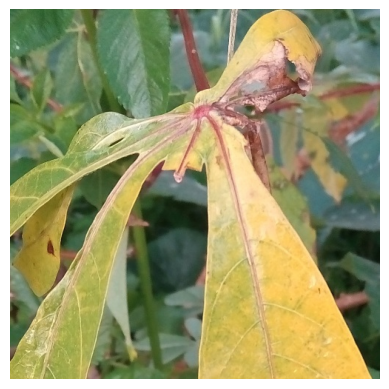

In [15]:
# inference onnx
import cv2
import numpy as np
import onnxruntime
import matplotlib.pyplot as plt

# Load the image using OpenCV
image = cv2.imread("./../dataset/cassavaleafdata/validation/cbb/validation-cbb-0.jpg")  # Load image in BGR format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Resize the image to your model input size
resized_image = cv2.resize(image, (384, 384))

# Normalize the image
mean = [0.485, 0.456, 0.406]  # Mean for normalization
std = [0.229, 0.224, 0.225]   # Standard deviation for normalization
normalized_image = (resized_image / 255.0  - mean) / std

# Convert the image to a format suitable for ONNX inference
input_tensor = normalized_image.transpose(2, 0, 1)  # Change shape from (H, W, C) to (C, H, W)
input_tensor = np.expand_dims(input_tensor, axis=0)  # Add batch dimension (1, C, H, W)
input_tensor = input_tensor.astype(np.float32)       # Ensure the data type is float32

# Load the ONNX model, REMEMBER TO REVISE THE NAME
session = onnxruntime.InferenceSession("seresnext101d_32x8d.onnx", providers=["CUDAExecutionProvider"])

# Get the input name for the model
input_name = session.get_inputs()[0].name

# Run inference
outputs = session.run(None, {input_name: input_tensor})

# Get the output (logits)
logits = outputs[0]

# Apply softmax to convert logits to probabilities
probabilities = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)

# Get the predicted class index
predicted_class_index = np.argmax(probabilities)

# Print the predicted class index and probabilities
print(f"Predicted Class Index: {predicted_class_index}")
print(f"Probabilities: {probabilities}")
plt.imshow(image)
plt.axis("off")  # Hide axes for better visualization
plt.show()